<a href="https://colab.research.google.com/github/bagindawilliams/time-series-data-for-weather/blob/main/UTS_Pembelajaran_Mendalam_untuk_Teknik_Elektro_Soal_nomor_3_Baginda_Miraj_Williamsyah_201012320010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dataset

In [ ]:
!pip install openmeteo-requests requests-cache retry-requests pandas numpy matplotlib seaborn


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2328 entries, 0 to 2327
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   date                       2328 non-null   datetime64[ns, UTC]
 1   temperature_2m             2328 non-null   float32            
 2   relative_humidity_2m       2328 non-null   float32            
 3   dew_point_2m               2328 non-null   float32            
 4   apparent_temperature       2328 non-null   float32            
 5   precipitation_probability  2328 non-null   float32            
 6   precipitation              2328 non-null   float32            
 7   pressure_msl               2328 non-null   float32            
 8   cloud_cover                2328 non-null   float32            
 9   visibility                 2293 non-null   float32            
 10  wind_speed_10m             2328 non-null   float32            
dtypes: d

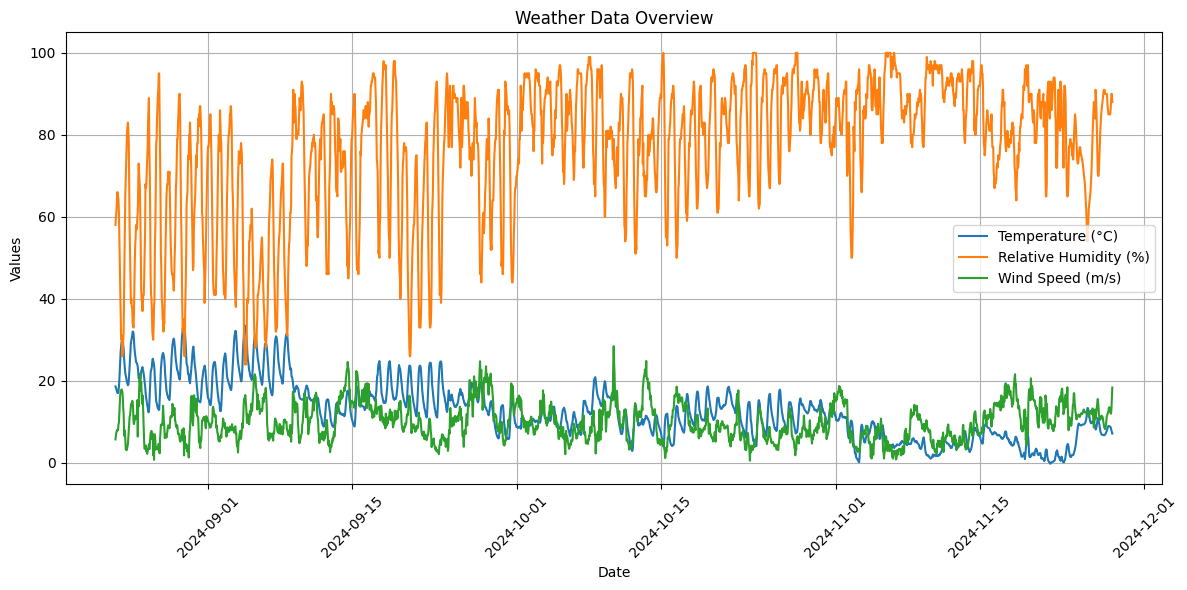

In [ ]:
import openmeteo_requests
import requests_cache
from retry_requests import retry
import pandas as pd
import numpy as np

# Setup sesi dengan cache dan retry untuk API
cache_session = requests_cache.CachedSession('.cache', expire_after=3600)
retry_session = retry(cache_session, retries=5, backoff_factor=0.2)
openmeteo = openmeteo_requests.Client(session=retry_session)

# Parameter API (gunakan dari API Anda)
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 52.52,  # Contoh: Berlin
    "longitude": 13.41,
    "hourly": [
        "temperature_2m", "relative_humidity_2m", "dew_point_2m",
        "apparent_temperature", "precipitation_probability", "precipitation",
        "pressure_msl", "cloud_cover", "visibility", "wind_speed_10m"
    ],
    "past_days": 90,  # Data 90 hari terakhir
    "timezone": "auto"
}

# Ambil data dari API
response = openmeteo.weather_api(url, params=params)
weather_data = response[0]  # Ambil respons pertama

# Proses data hourly
hourly = weather_data.Hourly()
hourly_time = pd.date_range(
    start=pd.to_datetime(hourly.Time(), unit="s", utc=True),
    end=pd.to_datetime(hourly.TimeEnd(), unit="s", utc=True),
    freq=pd.Timedelta(seconds=hourly.Interval()),
    inclusive="left"
)

# Buat DataFrame dari data hourly
hourly_data = {
    "date": hourly_time,
    "temperature_2m": hourly.Variables(0).ValuesAsNumpy(),
    "relative_humidity_2m": hourly.Variables(1).ValuesAsNumpy(),
    "dew_point_2m": hourly.Variables(2).ValuesAsNumpy(),
    "apparent_temperature": hourly.Variables(3).ValuesAsNumpy(),
    "precipitation_probability": hourly.Variables(4).ValuesAsNumpy(),
    "precipitation": hourly.Variables(5).ValuesAsNumpy(),
    "pressure_msl": hourly.Variables(6).ValuesAsNumpy(),
    "cloud_cover": hourly.Variables(7).ValuesAsNumpy(),
    "visibility": hourly.Variables(8).ValuesAsNumpy(),
    "wind_speed_10m": hourly.Variables(9).ValuesAsNumpy(),
}

hourly_dataframe = pd.DataFrame(hourly_data)

# Simpan ke file CSV (opsional untuk backup)
hourly_dataframe.to_csv("weather_hourly_data.csv", index=False)

# Tampilkan informasi dan beberapa data
print(hourly_dataframe.info())
print(hourly_dataframe.head())

# Visualisasi awal untuk kolom utama
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe['date'], hourly_dataframe['temperature_2m'], label="Temperature (°C)")
plt.plot(hourly_dataframe['date'], hourly_dataframe['relative_humidity_2m'], label="Relative Humidity (%)")
plt.plot(hourly_dataframe['date'], hourly_dataframe['wind_speed_10m'], label="Wind Speed (m/s)")
plt.legend()
plt.title("Weather Data Overview")
plt.xlabel("Date")
plt.ylabel("Values")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


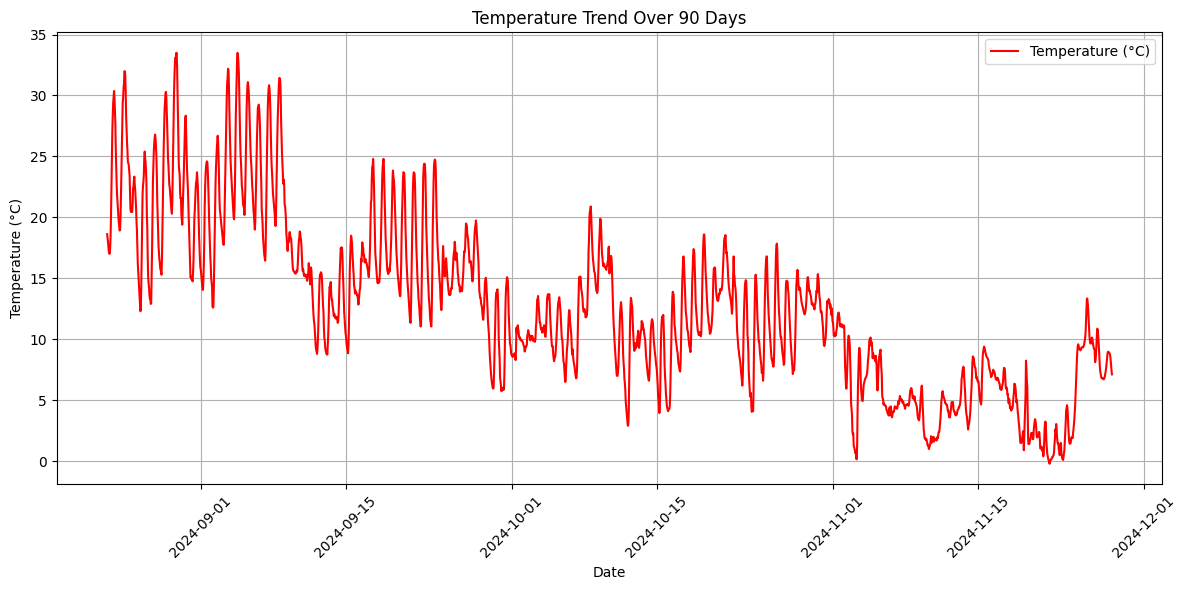

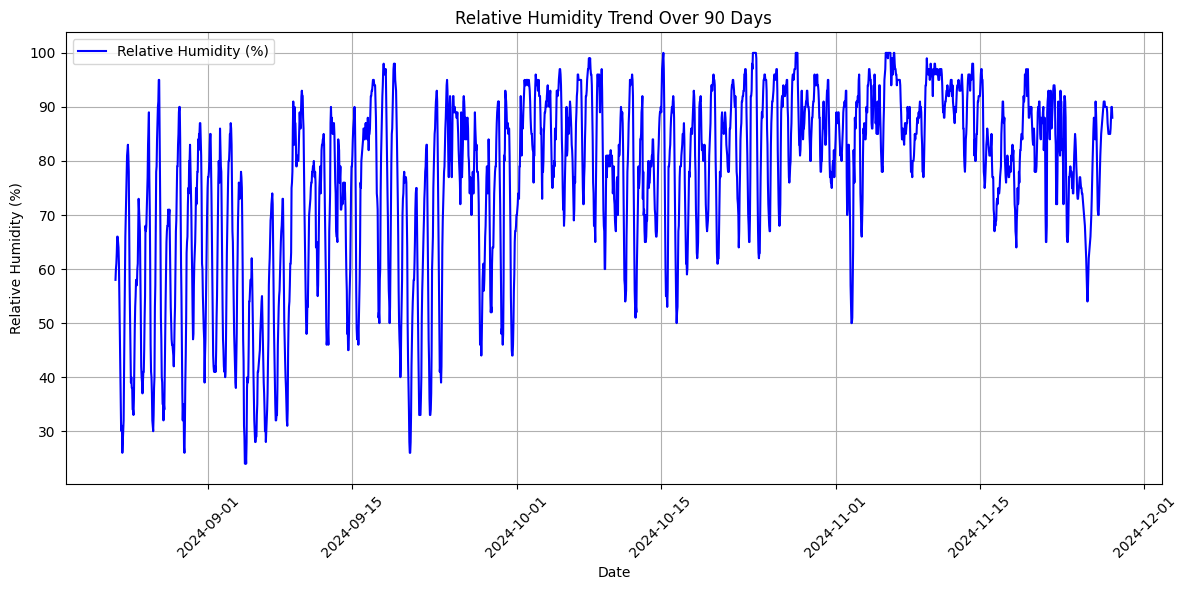

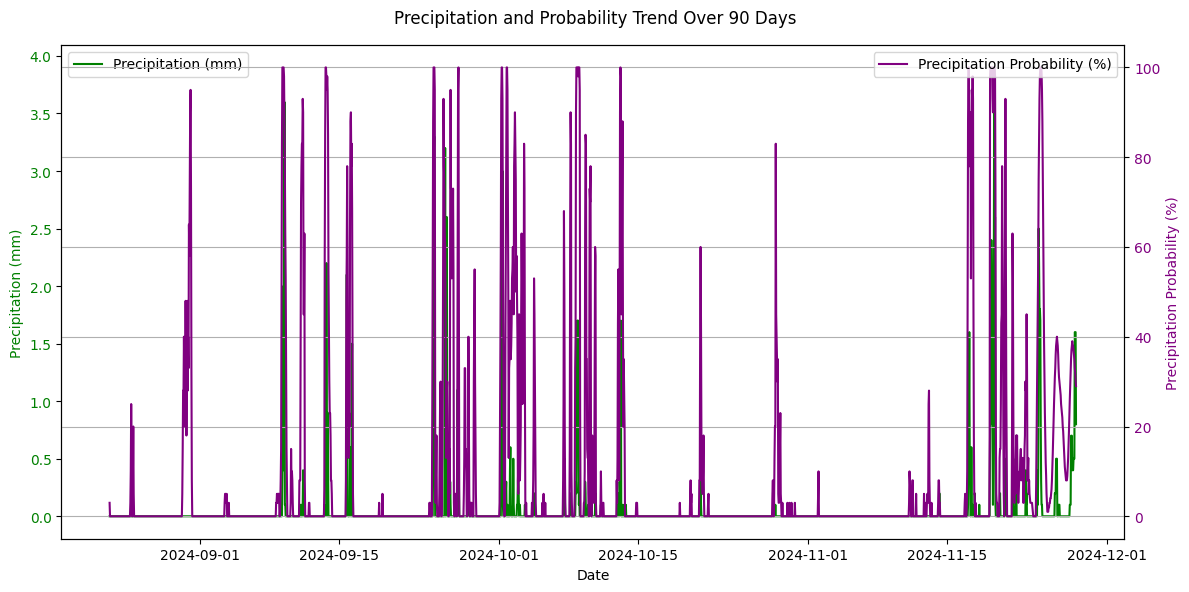

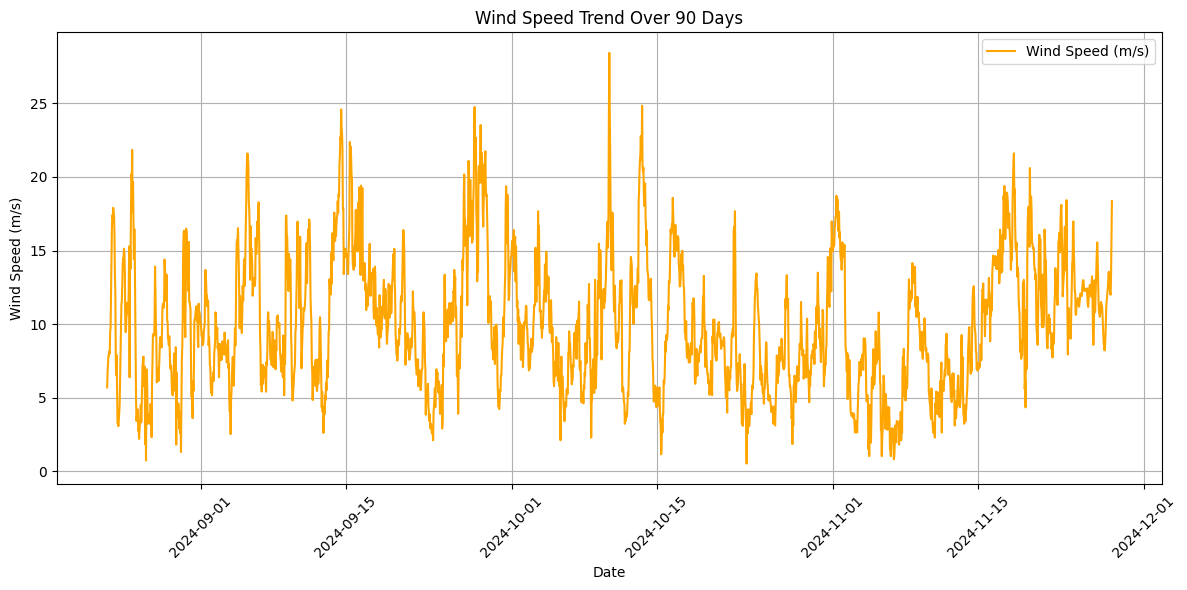

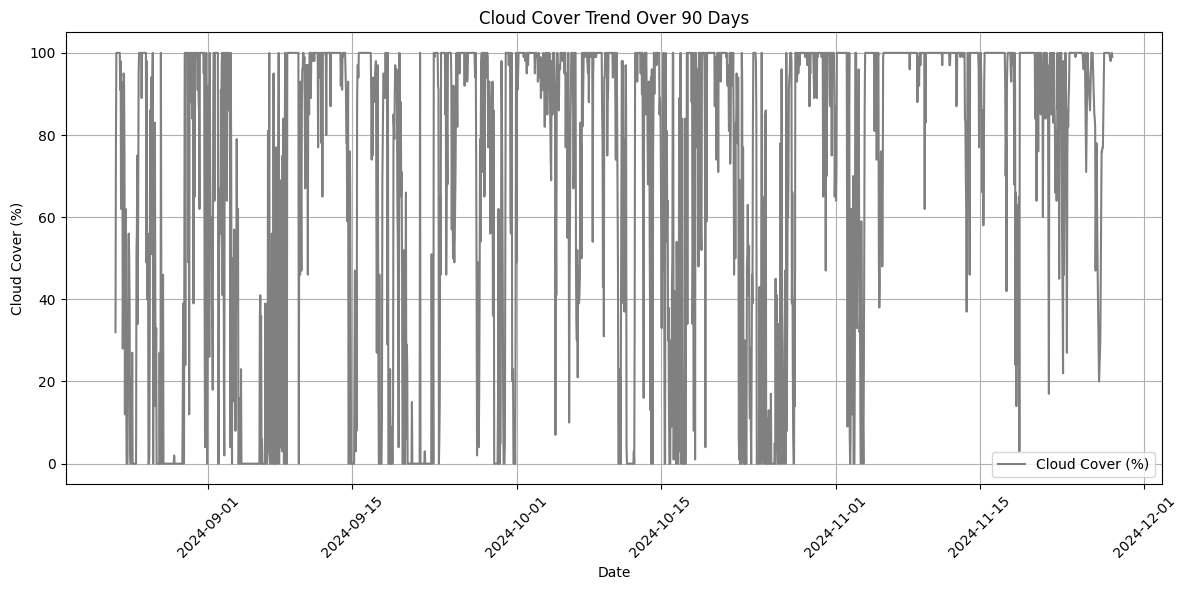

In [ ]:
# Visualisasi Data Cuaca
import matplotlib.pyplot as plt

# 1. Suhu (Temperature)
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe['date'], hourly_dataframe['temperature_2m'], label="Temperature (°C)", color='red')
plt.title("Temperature Trend Over 90 Days")
plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 2. Kelembapan Relatif (Relative Humidity)
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe['date'], hourly_dataframe['relative_humidity_2m'], label="Relative Humidity (%)", color='blue')
plt.title("Relative Humidity Trend Over 90 Days")
plt.xlabel("Date")
plt.ylabel("Relative Humidity (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 3. Curah Hujan (Precipitation) dan Probabilitasnya
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.set_xlabel("Date")
ax1.set_ylabel("Precipitation (mm)", color='green')
ax1.plot(hourly_dataframe['date'], hourly_dataframe['precipitation'], label="Precipitation (mm)", color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.legend(loc="upper left")

ax2 = ax1.twinx()
ax2.set_ylabel("Precipitation Probability (%)", color='purple')
ax2.plot(hourly_dataframe['date'], hourly_dataframe['precipitation_probability'], label="Precipitation Probability (%)", color='purple')
ax2.tick_params(axis='y', labelcolor='purple')
ax2.legend(loc="upper right")

fig.suptitle("Precipitation and Probability Trend Over 90 Days")
fig.tight_layout()
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 4. Kecepatan Angin (Wind Speed)
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe['date'], hourly_dataframe['wind_speed_10m'], label="Wind Speed (m/s)", color='orange')
plt.title("Wind Speed Trend Over 90 Days")
plt.xlabel("Date")
plt.ylabel("Wind Speed (m/s)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# 5. Tutupan Awan (Cloud Cover)
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe['date'], hourly_dataframe['cloud_cover'], label="Cloud Cover (%)", color='gray')
plt.title("Cloud Cover Trend Over 90 Days")
plt.xlabel("Date")
plt.ylabel("Cloud Cover (%)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# Pre-Processing Data

In [ ]:
!pip install --upgrade pip
!pip install scikit-learn==0.24.2

!pip install seaborn matplotlib sklearn seaborn numpy scipy

  Using cached scikit-learn-0.24.2.tar.gz (7.5 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

×

Jumlah data kosong sebelum interpolasi:
date                          0
temperature_2m                0
relative_humidity_2m          0
dew_point_2m                  0
apparent_temperature          0
precipitation_probability     0
precipitation                 0
pressure_msl                  0
cloud_cover                   0
visibility                   31
wind_speed_10m                0
dtype: int64

Jumlah data kosong setelah interpolasi:
date                          0
temperature_2m                0
relative_humidity_2m          0
dew_point_2m                  0
apparent_temperature          0
precipitation_probability     0
precipitation                 0
pressure_msl                  0
cloud_cover                   0
visibility                   31
wind_speed_10m                0
dtype: int64


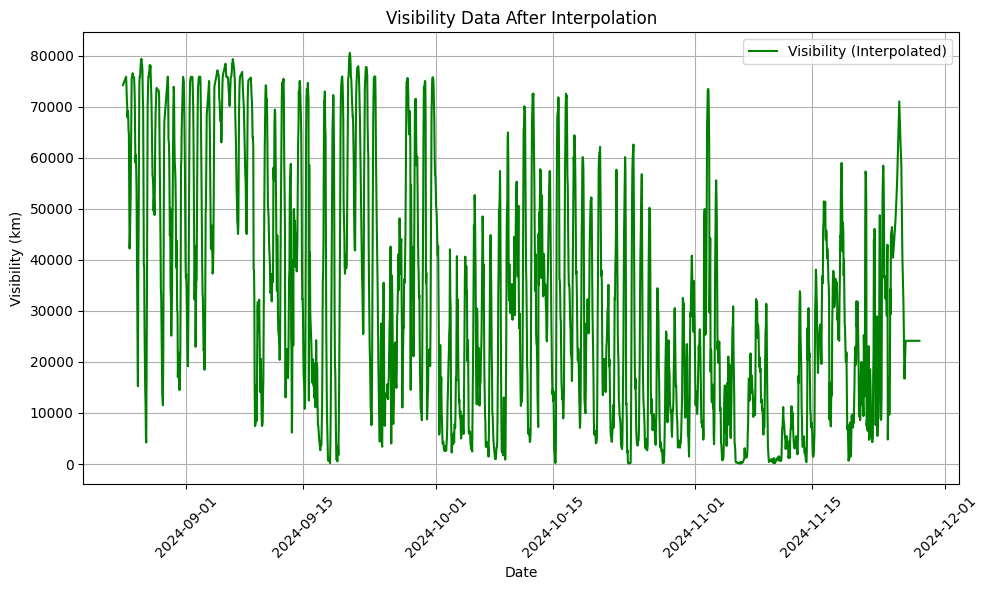


Batas bawah: -5.710749506950378, Batas atas: 29.339248776435852


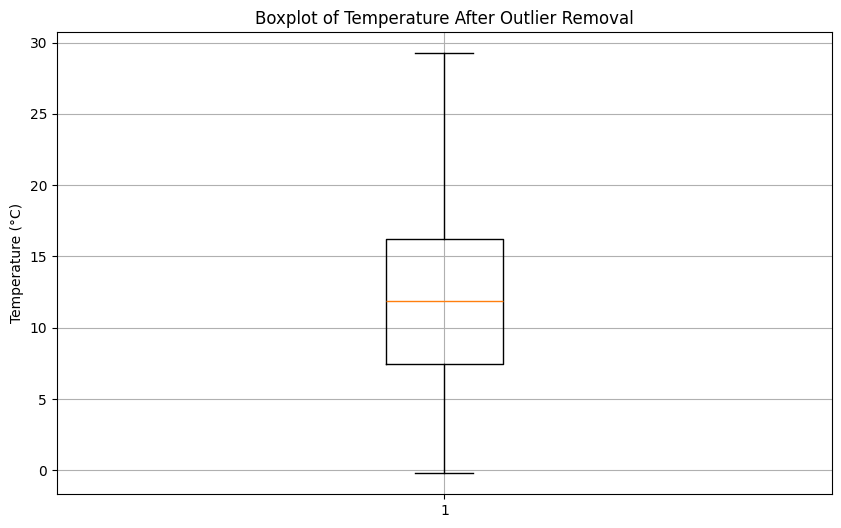

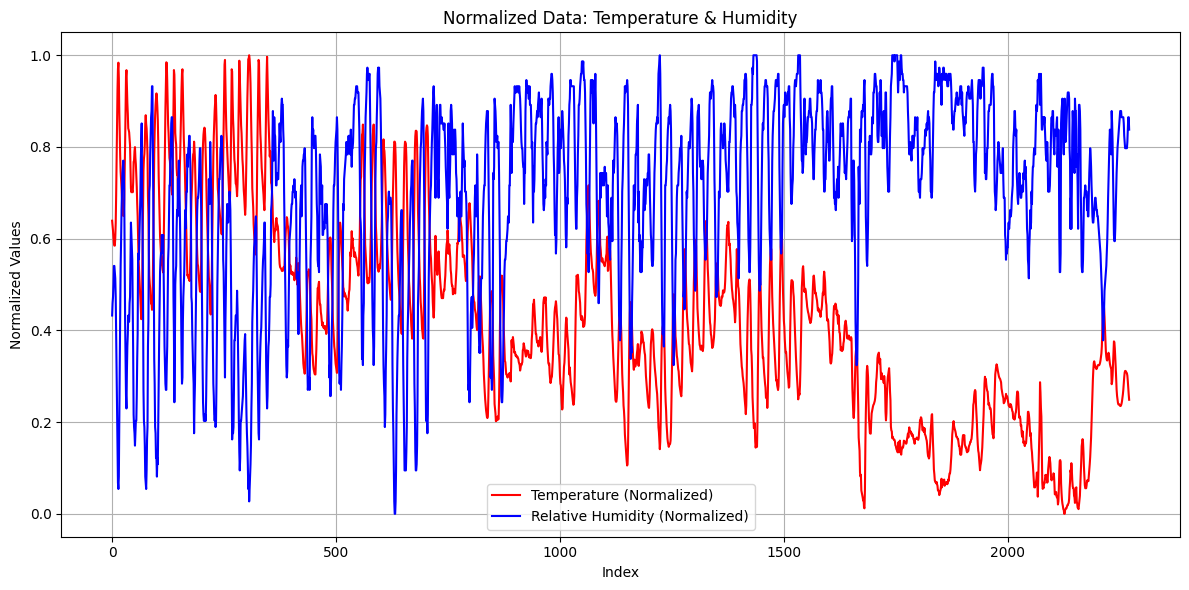


Dataset setelah preprocessing dan feature engineering:
   temperature_2m  relative_humidity_2m  dew_point_2m  apparent_temperature  \
0        0.639185              0.432432      0.623089              0.632569   
1        0.628998              0.459459      0.632818              0.621712   
2        0.617114              0.472973      0.629308              0.608847   
3        0.601834              0.500000      0.631831              0.594279   
4        0.589949              0.540541      0.647581              0.587460   

   precipitation_probability  precipitation  pressure_msl  cloud_cover  \
0                       0.03            0.0      0.501909         0.32   
1                       0.00            0.0      0.492367         0.77   
2                       0.00            0.0      0.492367         1.00   
3                       0.00            0.0      0.492367         1.00   
4                       0.00            0.0      0.484734         1.00   

   visibility  wind_spee

In [ ]:
# Perbarui pip dan instal library yang diperlukan
!pip install --upgrade pip
!pip install scikit-learn seaborn matplotlib numpy

# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Periksa data kosong sebelum interpolasi
print("Jumlah data kosong sebelum interpolasi:")
print(hourly_dataframe.isnull().sum())

# Penanganan data kosong dengan interpolasi
hourly_dataframe['visibility'] = hourly_dataframe['visibility'].interpolate(method='linear')

# Periksa kembali data kosong
print("\nJumlah data kosong setelah interpolasi:")
print(hourly_dataframe.isnull().sum())


# Visualisasi distribusi data visibility setelah interpolasi
plt.figure(figsize=(10, 6))
plt.plot(hourly_dataframe['date'], hourly_dataframe['visibility'], label="Visibility (Interpolated)", color='green')
plt.title("Visibility Data After Interpolation")
plt.xlabel("Date")
plt.ylabel("Visibility (km)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 2. Identifikasi dan Penanganan Pencilan (Outliers)
# Menggunakan metode IQR untuk kolom temperature_2m
Q1 = hourly_dataframe['temperature_2m'].quantile(0.25)
Q3 = hourly_dataframe['temperature_2m'].quantile(0.75)
IQR = Q3 - Q1

# Definisi batas pencilan
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nBatas bawah: {lower_bound}, Batas atas: {upper_bound}")

# Filter data untuk menghapus pencilan
hourly_dataframe = hourly_dataframe[
    (hourly_dataframe['temperature_2m'] >= lower_bound) &
    (hourly_dataframe['temperature_2m'] <= upper_bound)
]

# Visualisasi suhu setelah penghapusan pencilan
plt.figure(figsize=(10, 6))
plt.boxplot(hourly_dataframe['temperature_2m'])
plt.title("Boxplot of Temperature After Outlier Removal")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()

# 3. Normalisasi Data
# Drop kolom tanggal untuk normalisasi (akan ditambahkan kembali setelah normalisasi)
features_to_normalize = hourly_dataframe.drop(columns=['date'])

# Normalisasi menggunakan MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(features_to_normalize)

# Membuat DataFrame hasil normalisasi
hourly_dataframe_normalized = pd.DataFrame(
    normalized_data, columns=features_to_normalize.columns
)
hourly_dataframe_normalized['date'] = hourly_dataframe['date']

# Visualisasi Data Normalisasi
plt.figure(figsize=(12, 6))
plt.plot(hourly_dataframe_normalized['temperature_2m'], label="Temperature (Normalized)", color='red')
plt.plot(hourly_dataframe_normalized['relative_humidity_2m'], label="Relative Humidity (Normalized)", color='blue')
plt.title("Normalized Data: Temperature & Humidity")
plt.xlabel("Index")
plt.ylabel("Normalized Values")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Feature Engineering
# Tambahkan kolom bulan dan jam dari kolom tanggal
hourly_dataframe_normalized['month'] = pd.to_datetime(hourly_dataframe_normalized['date']).dt.month
hourly_dataframe_normalized['hour'] = pd.to_datetime(hourly_dataframe_normalized['date']).dt.hour

print("\nDataset setelah preprocessing dan feature engineering:")
print(hourly_dataframe_normalized.head())




# Pastikan y_test tidak mengandung NaN
if np.isnan(y_test).any():
    print("y_test mengandung NaN, mengisi dengan interpolasi.")
    y_test = y_test.interpolate()

# Pastikan X_test tidak mengandung NaN
if np.isnan(X_test).any():
    print("X_test mengandung NaN, mengganti dengan 0.")
    X_test = np.nan_to_num(X_test)

# Prediksi dengan model
y_pred = model.predict(X_test)

# Pastikan y_pred tidak mengandung NaN
if np.isnan(y_pred).any():
    print("y_pred mengandung NaN, periksa model atau data input.")
else:
    # Hitung Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE) pada data uji: {mse}")

    # Visualisasi Prediksi vs Aktual
    plt.figure(figsize=(12, 6))
    plt.plot(y_test.values, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='red')
    plt.title('Actual vs Predicted')
    plt.xlabel('Samples')
    plt.ylabel('Temperature (Normalized)')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

print("Apakah y_pred mengandung NaN?")
print(np.isnan(y_pred).any())
print("Apakah X_test mengandung NaN?")
print(np.isnan(X_test).any())
X_test = np.nan_to_num(X_test)  # Mengganti NaN dengan 0
y_pred = np.nan_to_num(y_pred)  # Mengganti NaN dengan 0

# Identifikasi Fitur Penting

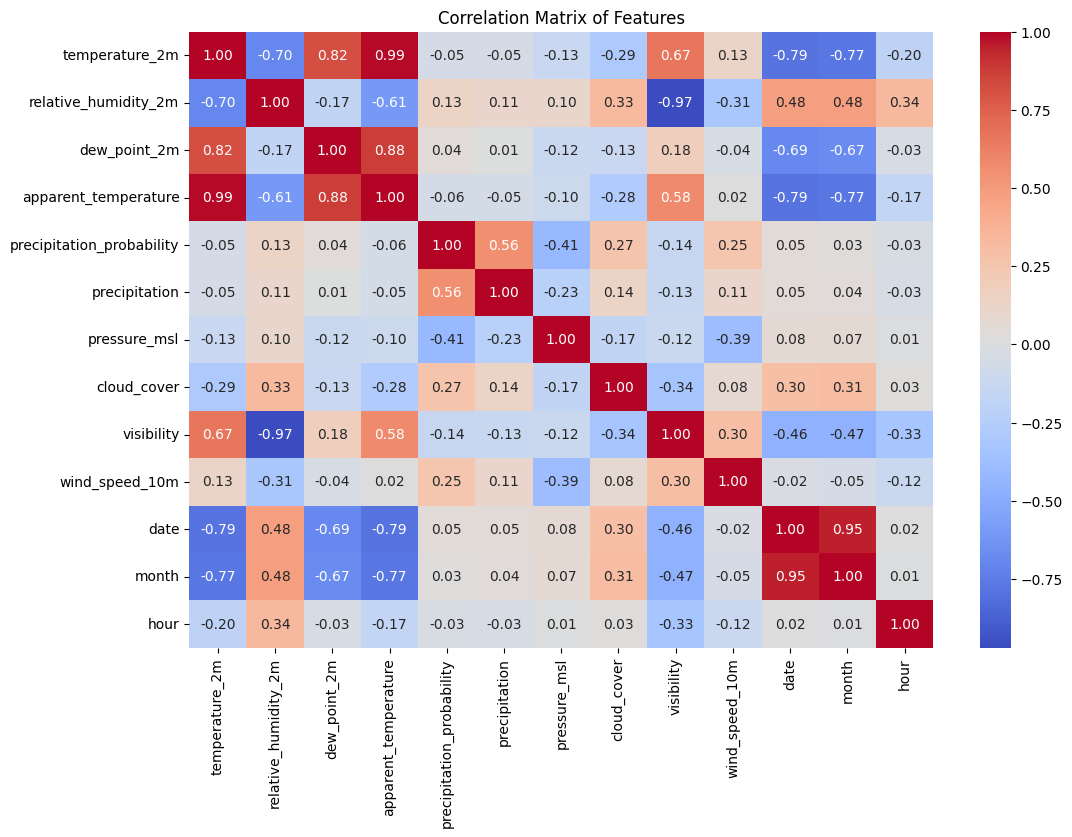


Korelasi terhadap target (temperature_2m):
temperature_2m               1.000000
apparent_temperature         0.989855
dew_point_2m                 0.820488
visibility                   0.665768
wind_speed_10m               0.127956
precipitation               -0.054105
precipitation_probability   -0.054131
pressure_msl                -0.130227
hour                        -0.198145
cloud_cover                 -0.286186
relative_humidity_2m        -0.695481
month                       -0.773418
date                        -0.786756
Name: temperature_2m, dtype: float64

Feature Importance berdasarkan Random Forest:
                      Feature  Importance
2        apparent_temperature    0.981553
0        relative_humidity_2m    0.008322
8              wind_speed_10m    0.006177
7                  visibility    0.002809
5                pressure_msl    0.000343
1                dew_point_2m    0.000316
10                       hour    0.000247
6                 cloud_cover    0.000120


<ipython-input-32-b7b261078433>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette="viridis")


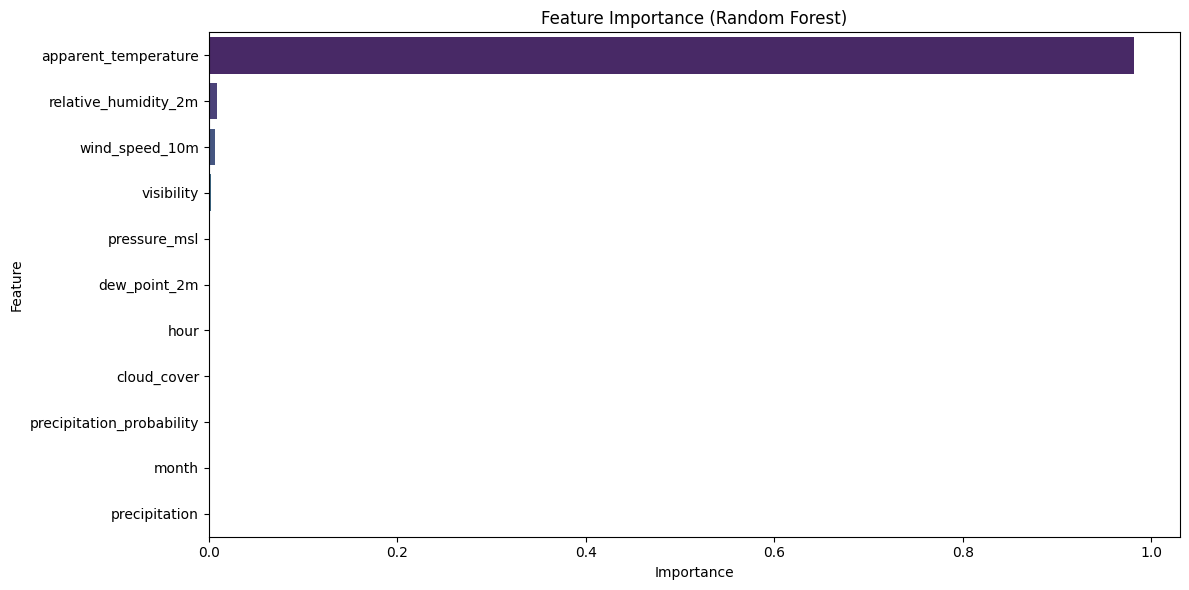

In [ ]:
# Import library tambahan
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt

# Pastikan dataset normalized dan variabel sudah tersedia
# Dataset yang digunakan: hourly_dataframe_normalized
# Target: temperature_2m

# 1. Analisis Korelasi
# Menghitung korelasi antara semua fitur
correlation_matrix = hourly_dataframe_normalized.corr()

# Menampilkan heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Features")
plt.show()

# Fokus pada korelasi terhadap target (temperature_2m)
correlation_with_target = correlation_matrix['temperature_2m'].sort_values(ascending=False)
print("\nKorelasi terhadap target (temperature_2m):")
print(correlation_with_target)

# 2. Feature Importance dengan Random Forest
# Pisahkan fitur (X) dan target (y)
X = hourly_dataframe_normalized.drop(columns=['temperature_2m', 'date'])
y = hourly_dataframe_normalized['temperature_2m']

# Membuat model Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X, y)

# Mendapatkan feature importance
feature_importances = rf_model.feature_importances_
feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importance berdasarkan Random Forest:")
print(feature_importances_df)

# Visualisasi feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


# Pembuatan Model Deep Learning

Shape X_train: (1798, 24, 3), y_train: (1798,)
Shape X_test: (450, 24, 3), y_test: (450,)
Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.1853 - mae: 0.3637 - val_loss: 0.0151 - val_mae: 0.1058
Epoch 2/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0118 - mae: 0.0867 - val_loss: 0.0089 - val_mae: 0.0826
Epoch 3/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 0.0080 - mae: 0.0705 - val_loss: 0.0041 - val_mae: 0.0528
Epoch 4/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 0.0040 - mae: 0.0488 - val_loss: 0.0041 - val_mae: 0.0498
Epoch 5/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0029 - mae: 0.0407 - val_loss: 0.0034 - val_mae: 0.0453
Epoch 6/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0019 - mae: 0.0335 - val_loss: 0.0031 - val_mae: 0.0428
Epoch 7/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0016 - mae: 0.0314 - val_loss: 0.0025 - val_mae: 0.0377
Epoch 8/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0014 - mae: 0.0290 - val_loss: 0.0028 - val_mae: 0.0407
Epoch 9/50
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0013 - mae: 0.

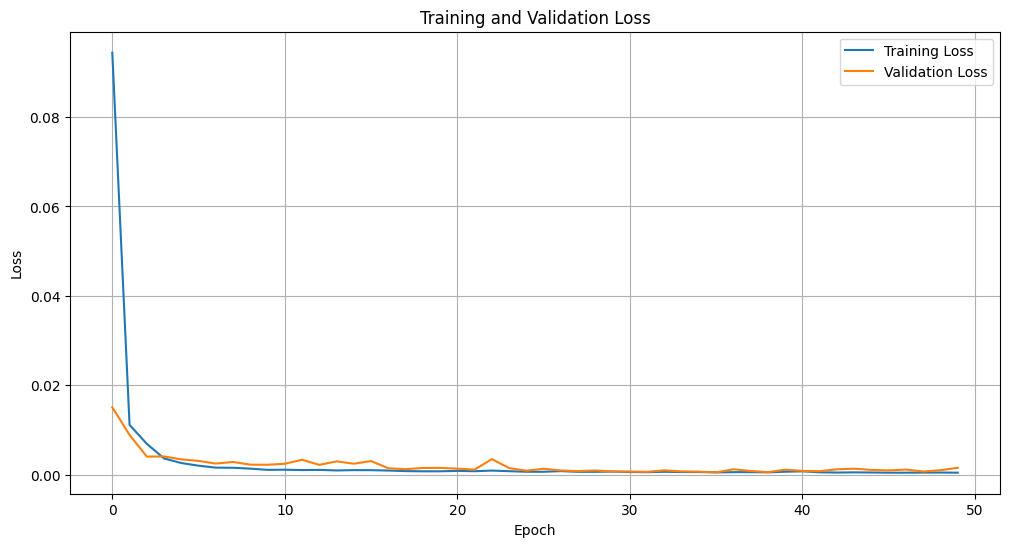

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
Mean Squared Error (MSE): 0.005347827915102243
R-squared (R2): 0.49052488803863525


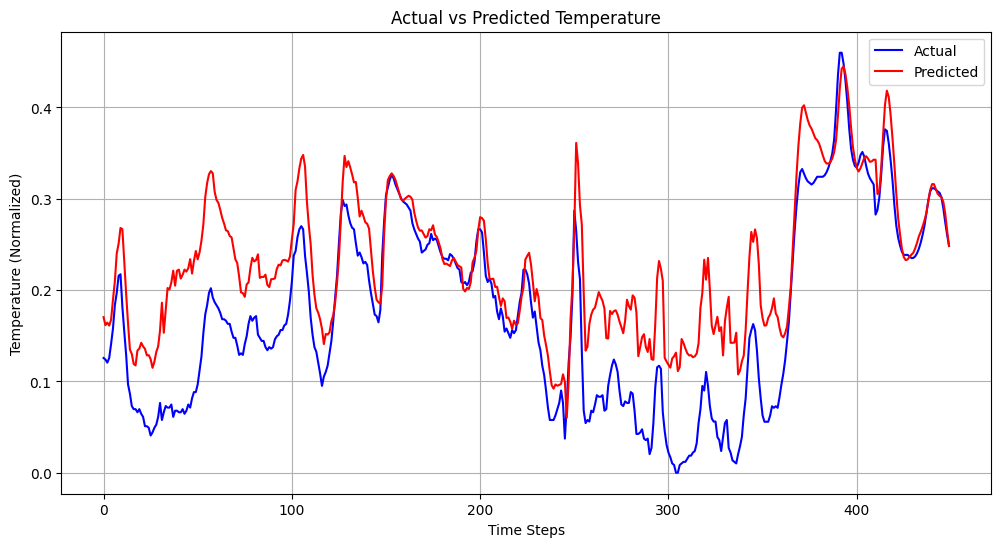

In [ ]:
# Import library tambahan
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Persiapan Dataset
# Gunakan fitur penting yang telah diidentifikasi
selected_features = ['dew_point_2m', 'apparent_temperature', 'relative_humidity_2m']
X = hourly_dataframe_normalized[selected_features]
y = hourly_dataframe_normalized['temperature_2m']

# Konversi data menjadi bentuk time-series
def create_time_series(data, target, time_steps):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i + time_steps])
        y.append(target[i + time_steps])
    return np.array(X), np.array(y)

time_steps = 24  # Menggunakan 24 jam terakhir untuk memprediksi 1 jam ke depan
X_time_series, y_time_series = create_time_series(X.values, y.values, time_steps)

# Membagi data menjadi train dan test set (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_time_series, y_time_series, test_size=0.2, shuffle=False)

print(f"Shape X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Shape X_test: {X_test.shape}, y_test: {y_test.shape}")

# 2. Membangun Model LSTM
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, len(selected_features))),
    Dense(1)  # Output layer untuk prediksi suhu
])

# Compile model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# 3. Melatih Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)

# Visualisasi Loss selama Pelatihan
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 4. Evaluasi Model
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Menghitung metrik evaluasi
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

# Visualisasi Prediksi vs Nilai Aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (Normalized)")
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - loss: 0.0906 - mae: 0.2364 - val_loss: 0.0097 - val_mae: 0.0805
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0196 - mae: 0.1075 - val_loss: 0.0104 - val_mae: 0.0824
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0140 - mae: 0.0931 - val_loss: 0.0070 - val_mae: 0.0671
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0112 - mae: 0.0819 - val_loss: 0.0053 - val_mae: 0.0571
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 0.0092 - mae: 0.0730 - val_loss: 0.0040 - val_mae: 0.0537
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0097 - mae: 0.0750 - val_loss: 0.0026 - val_mae: 0.0386
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0083 - mae: 0.0706 - val_loss: 0.0032 - val_mae: 0.0432
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.0073 - mae: 0.0667 - val_loss: 0.0028 - val_mae: 0.0432
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - lo

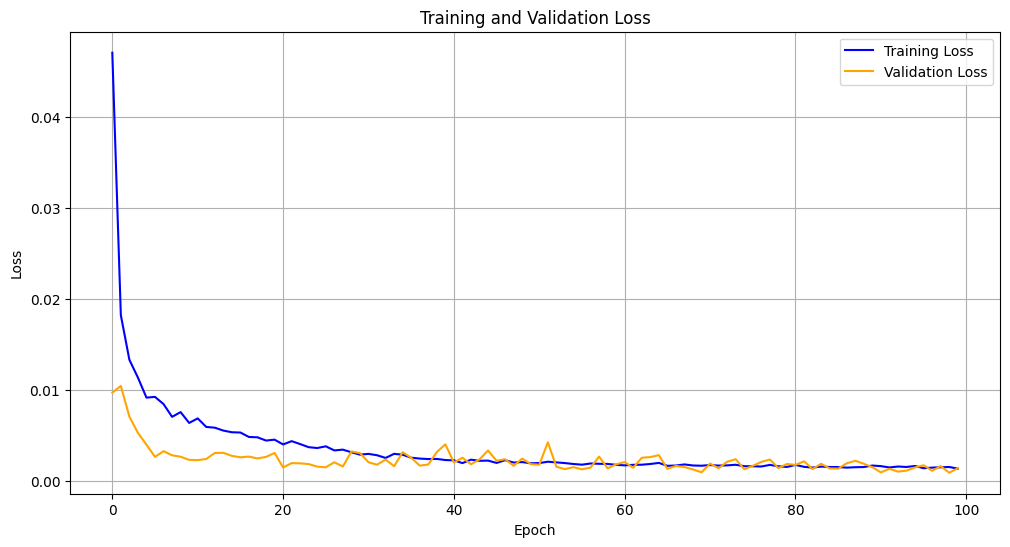

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step
Mean Squared Error (MSE): 0.0031808705534785986
Mean Absolute Error (MAE): 0.048199474811553955
Mean Absolute Percentage Error (MAPE): 1899293573120.0
R-squared (R2): 0.6969658732414246


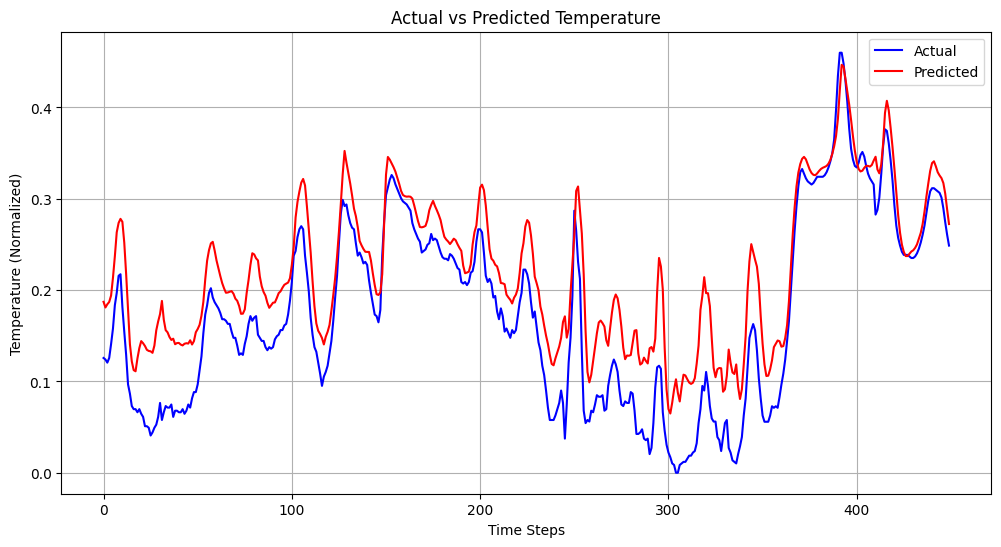

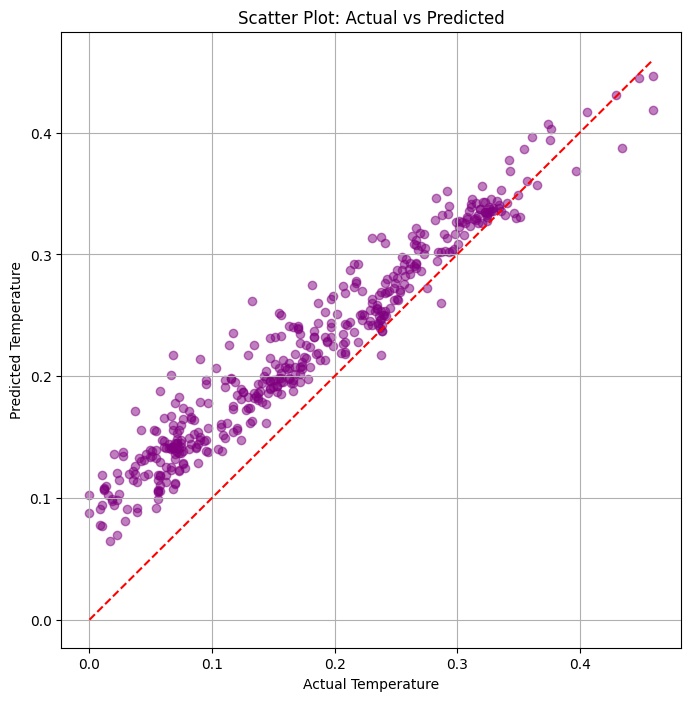

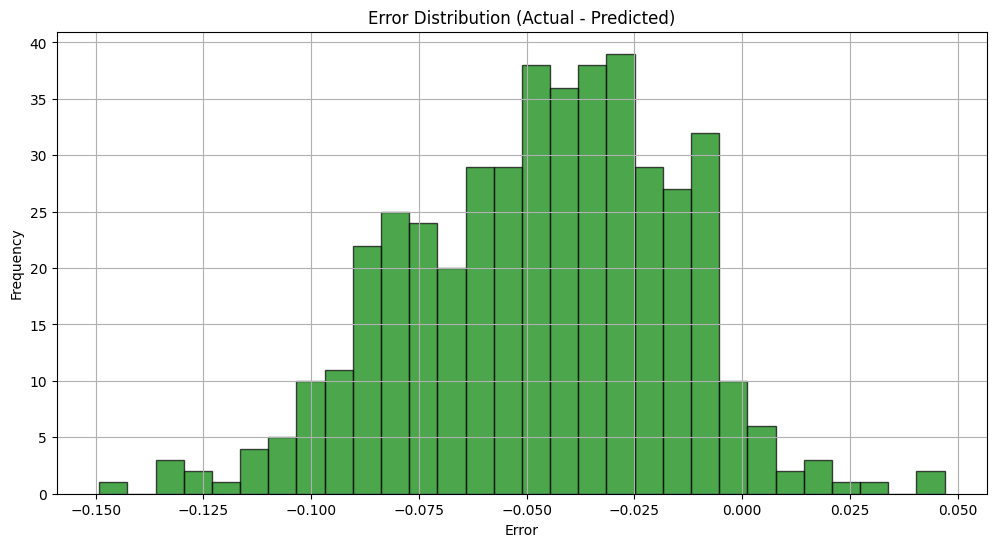

In [ ]:
# Import library tambahan untuk metrik evaluasi
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

# 1. Membangun Model LSTM dengan Dropout
from tensorflow.keras.layers import Dropout

model = Sequential([
    LSTM(64, activation='relu', return_sequences=True, input_shape=(time_steps, len(selected_features))),
    Dropout(0.2),  # Regularisasi untuk mencegah overfitting
    LSTM(32, activation='relu'),
    Dropout(0.2),
    Dense(1)  # Output layer untuk prediksi suhu
])

# Compile model dengan optimasi Adam
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Melatih model dengan lebih banyak epoch
history = model.fit(
    X_train, y_train,
    epochs=100,  # Lebih banyak epoch
    batch_size=16,  # Batch lebih kecil untuk pembelajaran yang lebih rinci
    validation_split=0.2,
    verbose=1
)

# Visualisasi Loss selama Pelatihan
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Training and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 2. Evaluasi Model
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi dengan berbagai metrik
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R2): {r2}")

# Visualisasi 1: Grafik Prediksi vs Nilai Aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi 2: Scatter Plot Prediksi vs Nilai Aktual
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.title("Scatter Plot: Actual vs Predicted")
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.grid(True)
plt.show()

# Visualisasi 3: Histogram Distribusi Kesalahan
errors = y_test - y_pred.flatten()
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title("Error Distribution (Actual - Predicted)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Pelatihan lanjutan untuk model


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0970 - mae: 0.2394 - val_loss: 0.0101 - val_mae: 0.0842
Epoch 2/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0187 - mae: 0.1073 - val_loss: 0.0115 - val_mae: 0.0921
Epoch 3/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - loss: 0.0154 - mae: 0.0974 - val_loss: 0.0074 - val_mae: 0.0692
Epoch 4/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0135 - mae: 0.0896 - val_loss: 0.0074 - val_mae: 0.0711
Epoch 5/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.0102 - mae: 0.0770 - val_loss: 0.0060 - val_mae: 0.0610
Epoch 6/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 0.0099 - mae: 0.0773 - val_loss: 0.0049 - val_mae: 0.0536
Epoch 7/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 0.0073 - mae: 0.0638 - val_loss: 0.0020 - val_mae: 0.0342
Epoch 8/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0078 - mae: 0.0680 - val_loss: 0.0020 - val_mae: 0.0364
Epoch 9/100
90/90 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0070 -

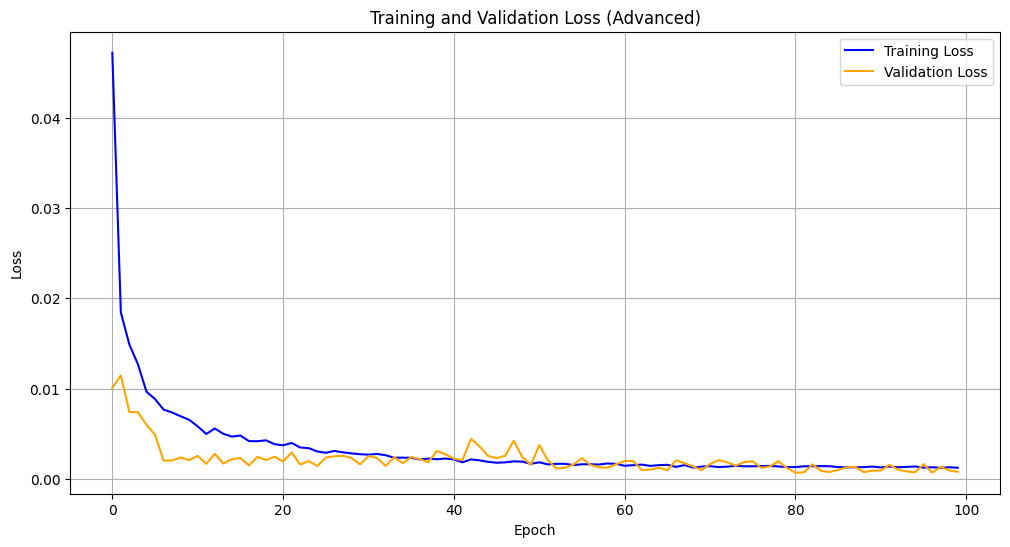

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
Mean Squared Error (MSE): 0.0024302126839756966
Root Mean Squared Error (RMSE): 0.049297187477350235
Mean Absolute Error (MAE): 0.03877793252468109
Mean Absolute Percentage Error (MAPE): 2027675189248.0
R-squared (R2): 0.7684792876243591


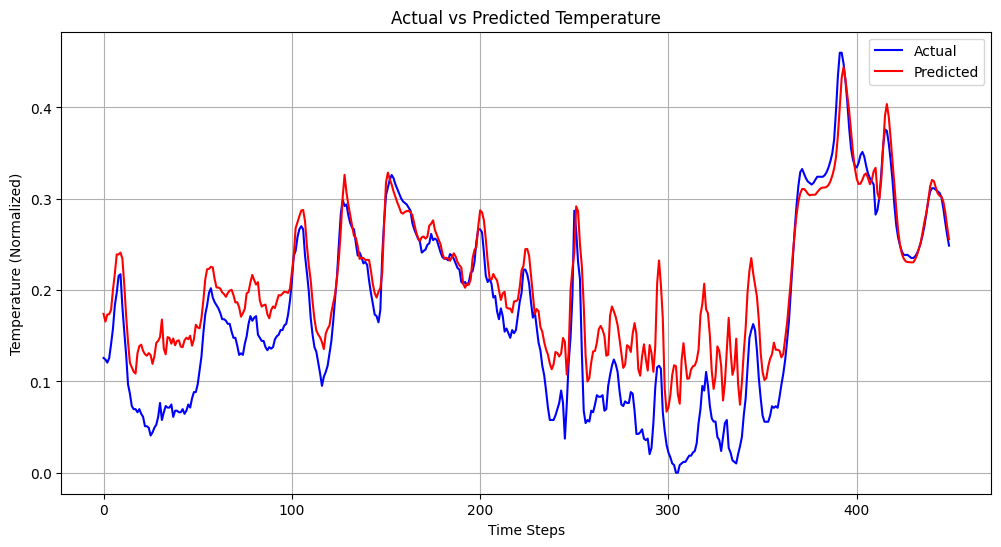

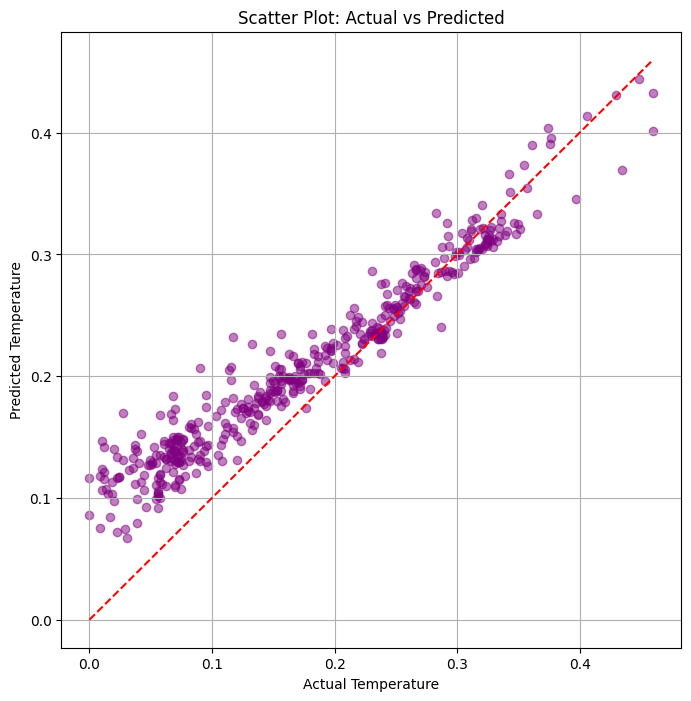

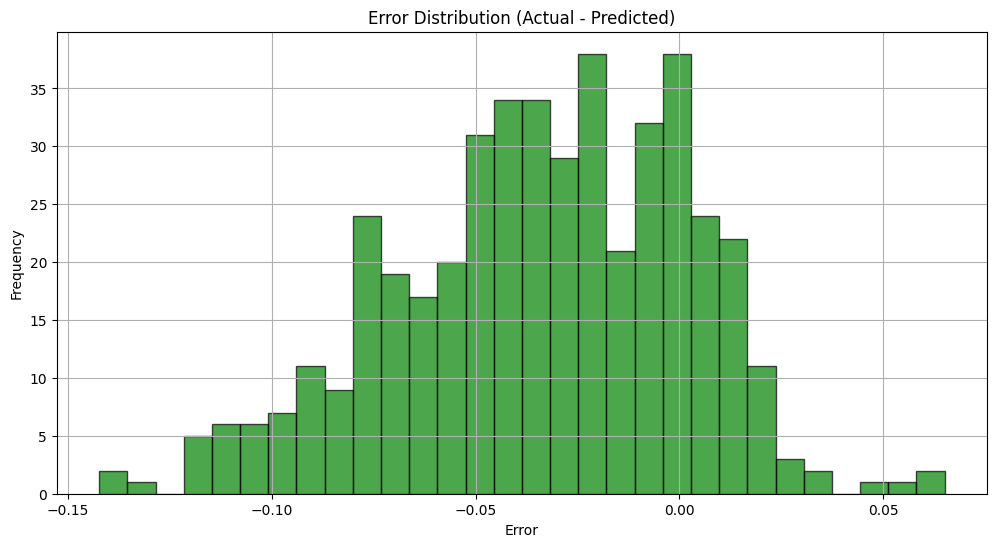

In [ ]:
# Install library TensorFlow jika belum terinstal
!pip install tensorflow

# Import library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

# 1. Definisikan Model Menggunakan TensorFlow Core API
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(64, return_sequences=True, activation='relu', input_shape=(time_steps, len(selected_features))),
    tf.keras.layers.Dropout(0.2),  # Regularisasi
    tf.keras.layers.LSTM(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)  # Lapisan output
])

# Optimizer dan Loss Function
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)  # Optimasi learning rate
loss_fn = tf.keras.losses.MeanSquaredError()  # Fungsi loss

# Compile Model
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['mae'])

# 2. Pelatihan Model
history = model.fit(
    X_train, y_train,
    epochs=100,  # Iterasi lebih banyak
    batch_size=16,  # Batch kecil untuk pembelajaran rinci
    validation_split=0.2,
    verbose=1
)

# Visualisasi Loss
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss', color='blue')
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
plt.title("Training and Validation Loss (Advanced)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()

# 3. Evaluasi Model
# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi Metrik
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
print(f"R-squared (R2): {r2}")

# 4. Visualisasi Hasil
# Visualisasi 1: Grafik Prediksi vs Nilai Aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title("Actual vs Predicted Temperature")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi 2: Scatter Plot
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='purple')
plt.title("Scatter Plot: Actual vs Predicted")
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Line of perfect prediction
plt.grid(True)
plt.show()

# Visualisasi 3: Heatmap Error
errors = y_test - y_pred.flatten()
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=30, color='green', edgecolor='black', alpha=0.7)
plt.title("Error Distribution (Actual - Predicted)")
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


# Evaluasi Lanjutan dan Visualisasi

Median Absolute Error (MedAE): 0.03379276022315025
Mean of Residuals: -0.03418736904859543
Standard Deviation of Residuals: 0.035516705363988876


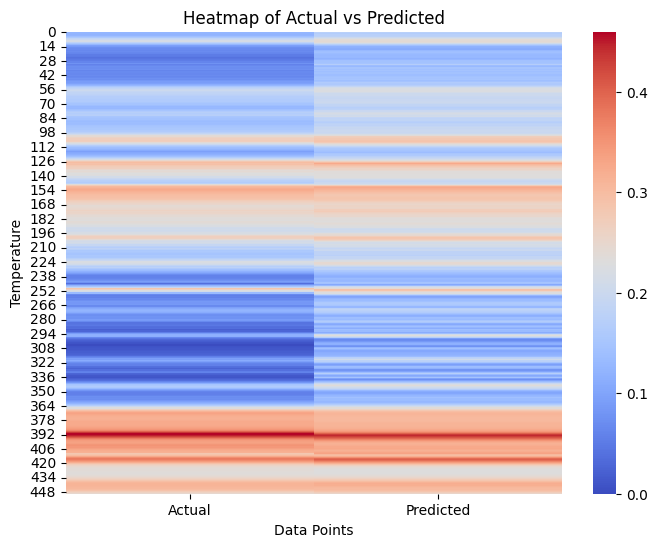

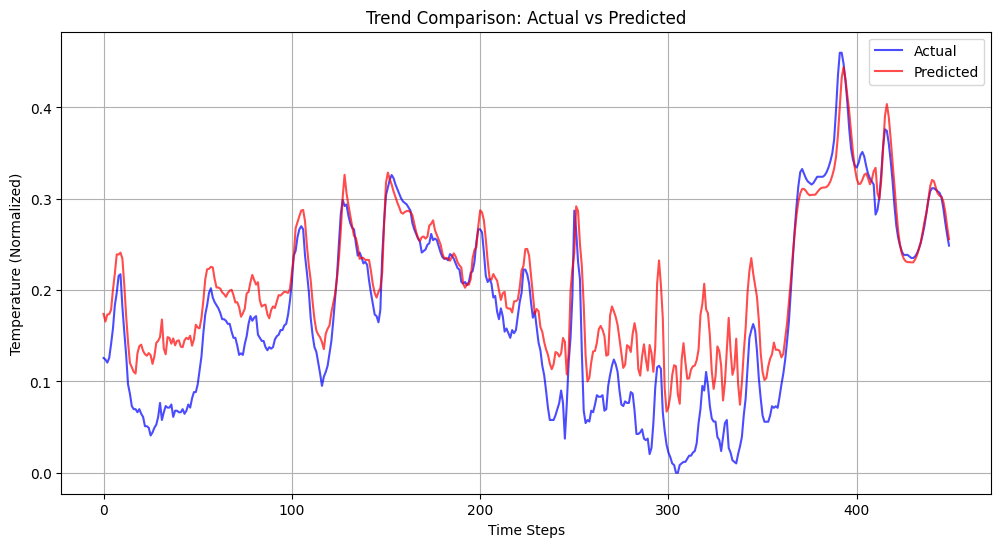

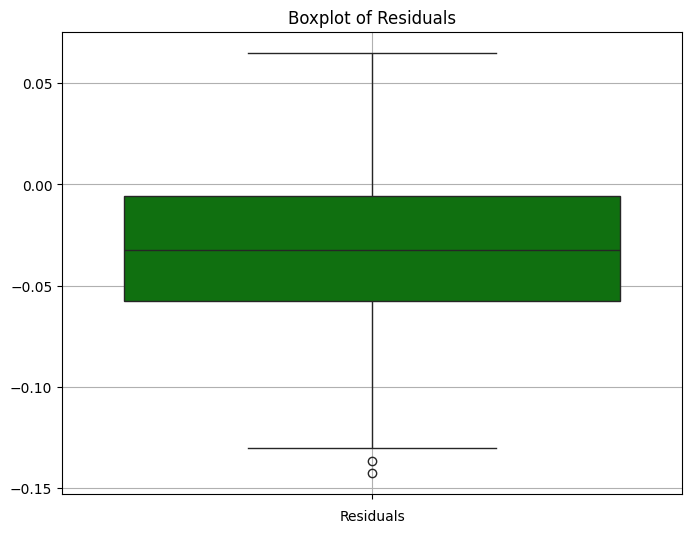

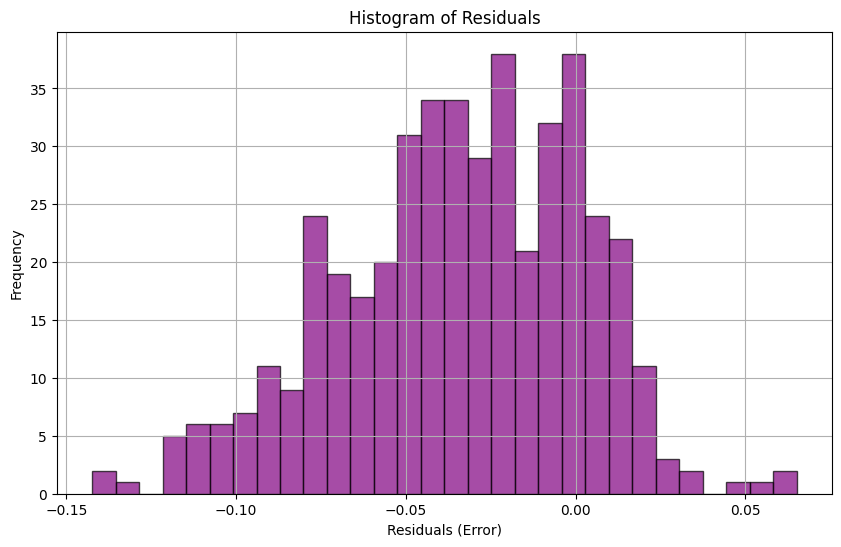

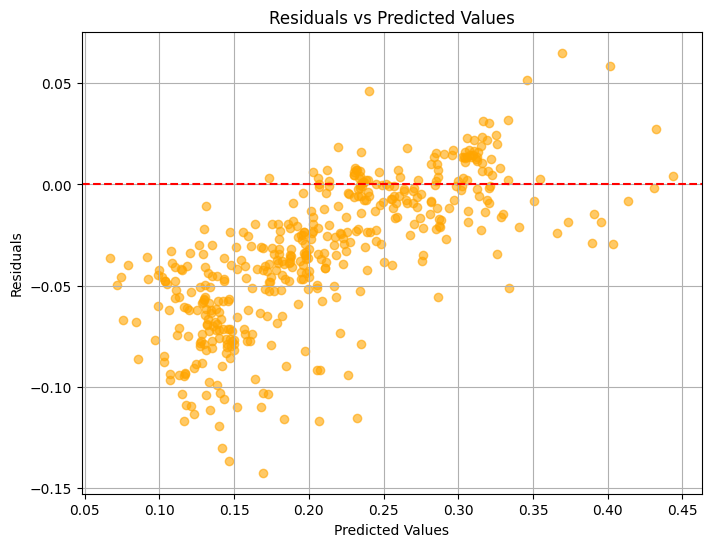

In [ ]:
# Import library tambahan
import seaborn as sns
from sklearn.metrics import median_absolute_error

# 1. Evaluasi Lanjutan
# Median Absolute Error
medae = median_absolute_error(y_test, y_pred)
print(f"Median Absolute Error (MedAE): {medae}")

# Analisis Residu
residuals = y_test - y_pred.flatten()
print(f"Mean of Residuals: {np.mean(residuals)}")
print(f"Standard Deviation of Residuals: {np.std(residuals)}")

# 2. Visualisasi Lanjutan

# Visualisasi 1: Heatmap Prediksi vs Aktual
plt.figure(figsize=(8, 6))
sns.heatmap(
    pd.DataFrame({"Actual": y_test, "Predicted": y_pred.flatten()}),
    annot=False, cmap="coolwarm", cbar=True
)
plt.title("Heatmap of Actual vs Predicted")
plt.xlabel("Data Points")
plt.ylabel("Temperature")
plt.show()

# Visualisasi 2: Diagram Garis Prediksi vs Aktual
plt.figure(figsize=(12, 6))
plt.plot(y_test, label="Actual", color="blue", alpha=0.7)
plt.plot(y_pred, label="Predicted", color="red", alpha=0.7)
plt.title("Trend Comparison: Actual vs Predicted")
plt.xlabel("Time Steps")
plt.ylabel("Temperature (Normalized)")
plt.legend()
plt.grid(True)
plt.show()

# Visualisasi 3: Boxplot Kesalahan
plt.figure(figsize=(8, 6))
sns.boxplot(residuals, color="green")
plt.title("Boxplot of Residuals")
plt.xlabel("Residuals")
plt.grid(True)
plt.show()

# Visualisasi 4: Histogram Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color="purple", edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Visualisasi 5: Scatter Plot Residuals vs Predicted
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, alpha=0.6, color="orange")
plt.axhline(y=0, color="red", linestyle="--")
plt.title("Residuals vs Predicted Values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.grid(True)
plt.show()


# Dokumentasi Analisis dan Evaluasi Model

Model saved to: saved_model/my_lstm_model.keras

=== Evaluation Summary ===
Mean Squared Error (MSE): 0.0024
Root Mean Squared Error (RMSE): 0.0493
Mean Absolute Error (MAE): 0.0388
Mean Absolute Percentage Error (MAPE): 2027675189248.0000
Median Absolute Error (MedAE): 0.0338
R-squared (R2): 0.7685


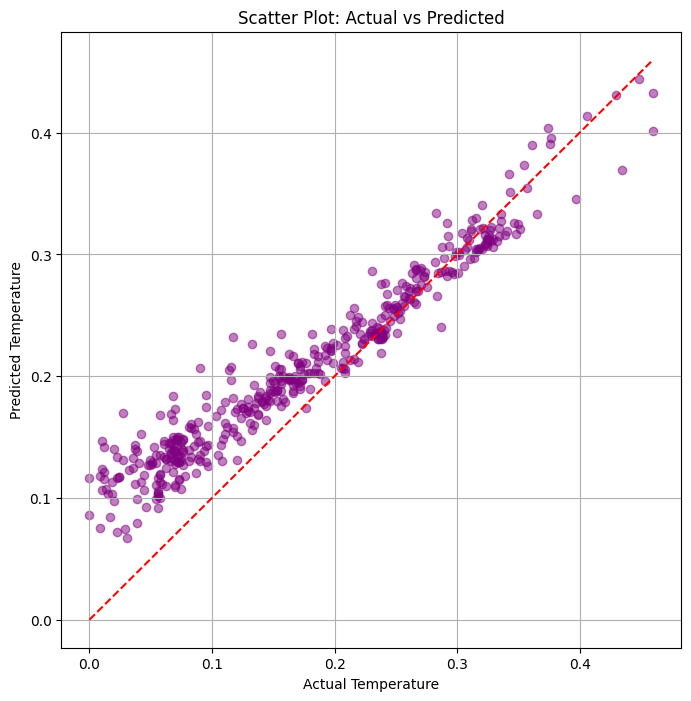

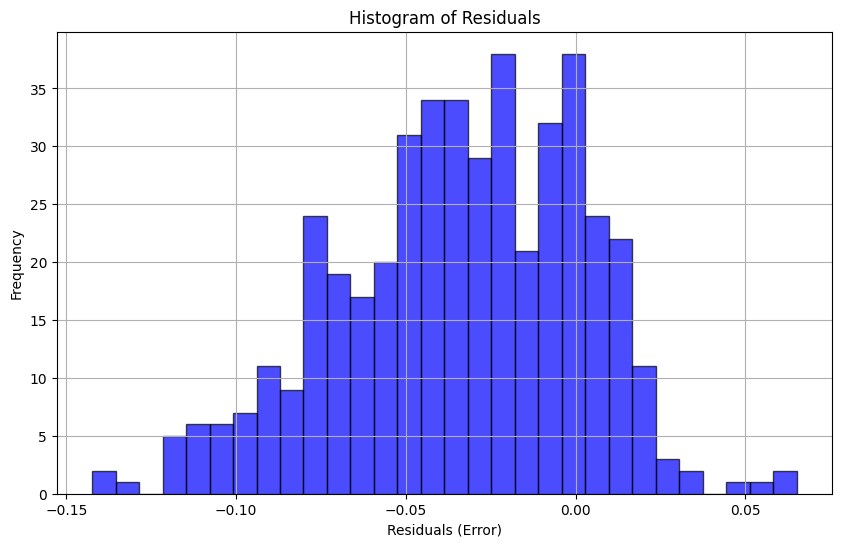

Model loaded successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step

Predicted Temperature for New Data: 0.1739


In [ ]:
# 1. Menyimpan Model
model_save_path = "saved_model/my_lstm_model.keras"
model.save(model_save_path)
print(f"Model saved to: {model_save_path}")

# 2. Dokumentasi Hasil
# Rekapitulasi Hasil Evaluasi
evaluation_summary = {
    "Mean Squared Error (MSE)": mse,
    "Root Mean Squared Error (RMSE)": rmse,
    "Mean Absolute Error (MAE)": mae,
    "Mean Absolute Percentage Error (MAPE)": mape,
    "Median Absolute Error (MedAE)": medae,
    "R-squared (R2)": r2,
}

print("\n=== Evaluation Summary ===")
for metric, value in evaluation_summary.items():
    print(f"{metric}: {value:.4f}")

# Menampilkan Visualisasi Utama
# Scatter Plot: Actual vs Predicted
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color="purple")
plt.title("Scatter Plot: Actual vs Predicted")
plt.xlabel("Actual Temperature")
plt.ylabel("Predicted Temperature")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Line of perfect prediction
plt.grid(True)
plt.show()

# Histogram Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, color="blue", edgecolor="black", alpha=0.7)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals (Error)")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# 3. Pipeline untuk Prediksi Data Baru
# Fungsi untuk Memuat Model dan Melakukan Prediksi
def load_model_and_predict(input_data):
    """
    Pipeline untuk memuat model dan melakukan prediksi.
    :param input_data: Numpy array dengan shape (time_steps, num_features).
    :return: Prediksi model.
    """
    # Muat model yang telah disimpan
    loaded_model = tf.keras.models.load_model(model_save_path)
    print("Model loaded successfully.")

    # Lakukan prediksi
    predictions = loaded_model.predict(input_data)
    return predictions

# Contoh Prediksi Data Baru
# Simulasikan data baru (24 jam terakhir dari fitur penting)
new_data = X_test[0].reshape(1, time_steps, len(selected_features))  # Ambil data dari X_test untuk simulasi
new_prediction = load_model_and_predict(new_data)

print(f"\nPredicted Temperature for New Data: {new_prediction[0][0]:.4f}")
